<a href="https://colab.research.google.com/github/khanhtran2000/OCR-Dev/blob/master/Image_Preprocessing_and_Loading_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2 as cv
import matplotlib.pyplot as plt

# Image preprocessing module
from PIL import Image, ImageFilter

In [54]:
# Load dataset
mapp = pd.read_csv('/content/drive/My Drive/EMNIST/emnist-bymerge-mapping.txt',
    delimiter=' ',
    names=['ASCII']
    )

mapp.head()

,ASCII
0,48
1,49
2,50
3,51
4,52


In [217]:
string_list = [chr(i) for i in mapp['ASCII'].values]
string_list
mapp['String'] = string_list
mapp

,ASCII,String
0,48,0
1,49,1
2,50,2
3,51,3
4,52,4
5,53,5
6,54,6
7,55,7
8,56,8
9,57,9


In [50]:
# Load model
model = load_model('/content/drive/My Drive/EMNIST/model/emnist_model.h5')
model

In [0]:
# Convert our own images to MNIST (and EMNIST) format 

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

In [153]:
file = "/content/drive/My Drive/EMNIST/images/letter_t_2.jpg"

image = imageprepare(file) # file path here
print(image) # mnist IMAGES are 28x28=784 pixels
print(type(image))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12156862745098039, 0.12549019607843137, 0.12156862745098039, 0.12156862745098039, 0.13725490196078433, 0.11372549019607843, 0.10196078431372549, 0.11764705882352941, 0.10980392156862745, 0.12549019607843137, 0.1411764705882353, 0.11764705882352941, 0.12549019607843137, 0.13725490196078433, 0.13725490196078433, 0.12549019607843137, 0.12941176470588237, 0.12549019607843137, 0.12549019607843137, 0.12549019607843137, 

In [0]:
thres_black = 0.35
thres_white = 0.60

In [214]:
new_image = []

for pixel in image:
    if pixel < thres_black:
        pixel = 0
    elif pixel >= thres_white:
        pixel = 1
    new_image.append(pixel)

print(new_image)
print(len(new_image))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35294117647058826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3764705882352941, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0.5568627450980392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.4588235294117647, 0.5058823529411764, 1, 1, 1, 1, 0.4627450980392157, 0.474509803

In [215]:
def reshape_ima(image):
    image = image.reshape(28, 28)
    return image 

#image = cv.imread(image, cv.IMREAD_GRAYSCALE)
new_image = np.apply_along_axis(reshape_ima, 0, new_image)
print(type(new_image))
print(new_image.shape)
print(new_image[0][0])
print(type(new_image[0][0]))

<class 'numpy.ndarray'>
(28, 28)
0.0
<class 'numpy.float64'>


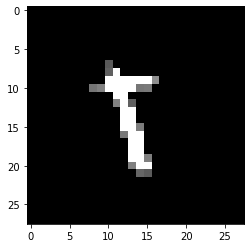

In [216]:
# Plotting
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.show()

In [211]:
# Reshape
new_image = new_image.reshape(-1, 28, 28, 1)
new_image = new_image / 255.0

type(new_image[0][0][0][0])

numpy.float64

In [212]:
# Predict
pred = model.predict_classes(new_image, batch_size=1)

print(pred)

[21]


In [169]:
mapp['String'][pred]

21    L
Name: String, dtype: object